<a href="https://colab.research.google.com/github/piaseckazaneta/Python/blob/main/Python_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing required libraries

This command installs the required Python libraries in the Colab environment:

- geopandas – for working with geospatial vector data

- matplotlib – for plotting maps and charts

- requests – for downloading files from the internet

Colab does not keep installed libraries between sessions, so this step is required.

In [1]:
!pip install matplotlib geopandas requests

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

Downloading the dataset (Warsaw districts)

This code sends an HTTP GET request to download a GeoJSON file containing the administrative boundaries of Warsaw districts from GitHub.

In [3]:
url = "https://raw.githubusercontent.com/andilabs/warszawa-dzielnice-geojson/master/warszawa-dzielnice.geojson"
r = requests.get(url)

Saving the downloaded file locally

Explanation:
The downloaded content is saved as a local file in the Colab runtime:

- "wb" means write binary

- this allows GeoPandas to read the file in the next step


In [4]:
with open("warszawa-dzielnice.geojson", "wb") as f:
  f.write(r.content)

print("Plik dzielnic pobrany pomyślnie")

Plik dzielnic pobrany pomyślnie


Loading the GeoJSON into GeoPandas

This reads the GeoJSON file and loads it into a GeoDataFrame, which is a Pandas DataFrame with a geometry column.

In [5]:
districts_gdf = gpd.read_file("warszawa-dzielnice.geojson")

Exploring the dataset structure

info() shows the columns, data types, and geometry type

head() displays the first few rows to understand the attribute data

This is a standard first step in any data analysis workflow.

In [6]:
print("📊 Info o geometrii i kolumnach:")
print(districts_gdf.info())
print(districts_gdf.head())

📊 Info o geometrii i kolumnach:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  19 non-null     int32   
 1   name        19 non-null     object  
 2   geometry    19 non-null     geometry
dtypes: geometry(1), int32(1), object(1)
memory usage: 512.0+ bytes
None
   cartodb_id       name                                           geometry
0           1   Warszawa  MULTIPOLYGON (((21.02753 52.36513, 21.02539 52...
1          22     Ochota  MULTIPOLYGON (((21.00152 52.22807, 20.99059 52...
2          25  Rembertów  MULTIPOLYGON (((21.13242 52.23909, 21.13313 52...
3           2     Bemowo  MULTIPOLYGON (((20.87309 52.21666, 20.87307 52...
4          19  Białołęka  MULTIPOLYGON (((20.99622 52.28734, 20.99782 52...


Plotting a basic map

This creates a simple static map of Warsaw districts:

- figsize controls the map size

- edgecolor highlights district borders

- axes are turned off for a cleaner cartographic output

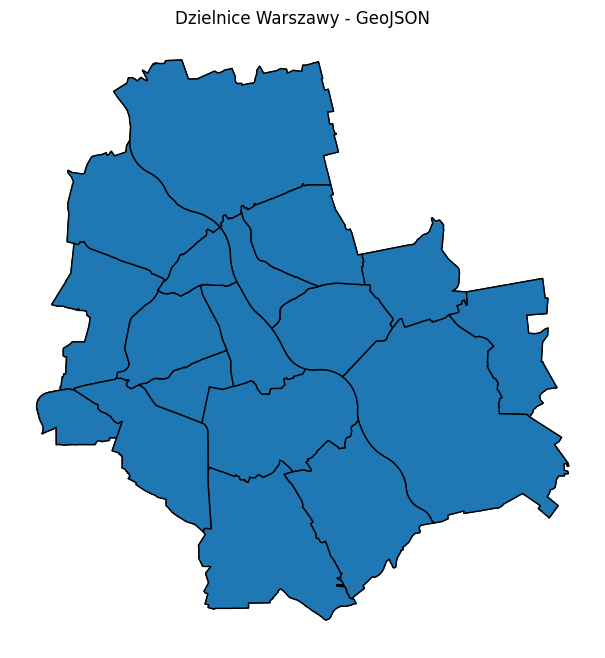

In [7]:
ax = districts_gdf.plot(figsize=(8, 8), edgecolor='black', column=None)
ax.set_title("Dzielnice Warszawy - GeoJSON")
plt.axis('off')
plt.show()


Python variables & types (using Warsaw districts)

In [8]:
type(districts_gdf)

geopandas.geodataframe.GeoDataFrame

In [10]:
city_name = "Warsaw"
number_of_districts = (len(districts_gdf))

In [12]:
print(type(city_name))
print(type(number_of_districts))

<class 'str'>
<class 'int'>


In [13]:
print(districts_gdf.crs)

EPSG:4326


In [14]:
districts_gdf_projected = districts_gdf.to_crs(epsg=2180)
print(districts_gdf_projected.crs)

EPSG:2180


In [15]:
districts_gdf_projected["area_m2"] = districts_gdf_projected.geometry.area

In [16]:
districts_gdf_projected

,cartodb_id,name,geometry,area_m2
0,1,Warszawa,"MULTIPOLYGON (((638006.999 501843.502, 637866....",5.168868e+08
1,22,Ochota,"MULTIPOLYGON (((636658.397 486555.359, 635919....",9.680919e+06
2,25,Rembertów,"MULTIPOLYGON (((645558.589 488036.332, 645605....",1.929143e+07
3,2,Bemowo,"MULTIPOLYGON (((627922.583 485053.359, 627921....",2.496911e+07
4,19,Białołęka,"MULTIPOLYGON (((636114.73 493135.194, 636221.6...",7.306188e+07
5,31,Wesoła,"MULTIPOLYGON (((654484.596 485077.679, 654402....",2.293394e+07
6,20,Bielany,"MULTIPOLYGON (((627976.969 493665.377, 627941....",3.229142e+07
7,21,Mokotów,"MULTIPOLYGON (((638727.391 484253.046, 638710....",3.557523e+07
8,23,Praga Południe,"MULTIPOLYGON (((642937.562 485314.028, 643191....",2.232466e+07
9,24,Praga Północ,"MULTIPOLYGON (((637243.873 494002.159, 637233....",1.140738e+07


In [19]:
first_area = districts_gdf_projected["area_m2"].iloc[0]
type(first_area)

numpy.float64

In [20]:
first_district_name = districts_gdf_projected["name"].iloc[0]

In [21]:
print(first_district_name)

Warszawa


In [22]:
type(first_district_name)

str

In [23]:
label = f"District: {first_district_name}"
print(label)

District: Warszawa


In [27]:
district_names = list(districts_gdf_projected["name"])
type(district_names)


list

In [28]:
type(district_names[0])

str